# 3-4-5 CAM FOLLOWER Synthesis:
## --Flat Face Cam Follower--
### Important points:
#### A) Basic equation stuffs
<ul>
    <li><b>Follower curve equation (rise period): Y<sub>1</sub> = 10L ( &#952 / &#946 )<sup>3</sup> - 15L ( &#952 / &#946 )<sup>4</sup> + 6L ( &#952 / &#946 )<sup>5</sup></b> <br> where, L= lift,<br> &#952= angle of rotation and <br> &#946 angle in which lift period occours</li>
    <li><b>Follower curve equation (return period): Y<sub>2</sub> = L-Y<sub>1</sub>.subs({&#952: &#952-&#945, &#946:&#946<sub>2</sub>})</b><br> where, subs({x:y , a:b}) means substitute y in place of x and b in place of a, <br> L= lift,<br> &#945= angle at which fall starts and <br> &#946<sub>2</sub> angle in which return period occours</li>
    <li><em>During rise, use Y=Y<sub>1</sub>,<br> after this during dwell period, Y=constant=L,<br> during return period, Y=Y<sub>2</sub> and <br>again dwell period Y=0 <br> this repeats after theta =2&#960, so if given theta is >2&#960, please adjust it accordingly!</em> </li>
    <li>To get velocity and acceleration, differentiate Y (v and a will also depends on whether it is rise period, return period or dwell period thus you'll have seperate equations for these which you'll later combine).</li>
</ul>

#### B) Formulae for values and stuff
<ul>
    <li> Min Base Radius & Radius Of Curvature Relation: <b> r<sub>b</sub> + (Y(&#952)+Y"(&#952))<sub>min</sub> > &#961<sub>allowable</sub> </b><br> where, &#961 = radius of curvature <br> r<sub>b</sub> = base radius <br> </li>
        <li>Width of Follower Face: <b>Y'<sub>max</sub> + abs(Y'<sub>min</sub>)</li>
        <li>coordinate of contact point (in polar form) :<b> r<sub>c</sub> = ((Y')<sup>2</sup>+(r<sub>b</sub>+Y)<sup>2</sup>)<sup>1/2</sup> <br> &#952<sub>c</sub>=&#952+&#945 </b><br> where, <b> &#945= tan<sup>-1</sup>(Y'/(r<sub>b</sub>+Y))</li>
            <li> <em>also Y' = e+&#949 =offset + eccentricity</em></li>
</ul>

In [18]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt


In [13]:
y1, L, theta, theta_ri, theta_re, theta_1 = sp.symbols('y1 L theta theta_ri theta_re theta_1')

y1 = 10*L*(theta/theta_ri)**3-15*L*(theta/theta_ri)**4+6*L*(theta/theta_ri)**5 #rise equation

y2 = L-y1.subs({theta:theta-theta_1, theta_ri:theta_re}) #retrun equation


In [14]:
# differentiate the expressions for y1 and y2 to get the velocity and acceleration
v1 = sp.diff(y1, theta)
a1 = sp.diff(v1, theta)

v2 = sp.diff(y2, theta)
a2 = sp.diff(v2, theta)

# choose numerical values of the parameters 
#change values here: 
theta_1_num = np.pi/2+0.5
theta_ri_num = np.pi/2-0.4 
theta_re_num = np.pi/2-0.5 
L_num = 50 


# substitute the numerical parameters into the symbolic expressions

y1s = y1.subs({L:L_num, theta_ri:theta_ri_num})
y2s = y2.subs({L:L_num, theta_re:theta_re_num, theta_1:theta_1_num})

v1s = v1.subs({L:L_num, theta_ri:theta_ri_num})
v2s = v2.subs({L:L_num, theta_re:theta_re_num, theta_1:theta_1_num})

a1s = a1.subs({L:L_num, theta_ri:theta_ri_num})
a2s = a2.subs({L:L_num, theta_re:theta_re_num, theta_1:theta_1_num})

# lambdify the symbolic functions to generate their analytical counter-parts

y1num = sp.lambdify(theta, y1s, 'numpy')
y2num = sp.lambdify(theta, y2s, 'numpy')

v1num = sp.lambdify(theta, v1s, 'numpy')
v2num = sp.lambdify(theta, v2s, 'numpy')

a1num = sp.lambdify(theta, a1s, 'numpy')
a2num = sp.lambdify(theta, a2s, 'numpy')

In [5]:
thetavec = np.linspace(0, 2*np.pi, 200, endpoint=False)
yvec = np.zeros_like(thetavec)
vvec = np.zeros_like(thetavec)
avec = np.zeros_like(thetavec)

for count in range(np.size(thetavec)):
    thetaval = thetavec[count]
    if thetaval<=theta_ri_num:
        yvec[count]=y1num(thetaval)
        vvec[count]=v1num(thetaval)
        avec[count]=a1num(thetaval)
        
    elif thetaval>theta_ri_num and thetaval<theta_1_num:
        yvec[count]=L_num
    elif thetaval>=theta_1_num and thetaval<=(theta_1_num+theta_re_num):
        yvec[count]=y2num(thetaval)
        vvec[count]=v2num(thetaval)
        avec[count]=a2num(thetaval)
        
    else:
        yvec[count]=0

Text(0.5, 1.0, 'Follower Displacement')

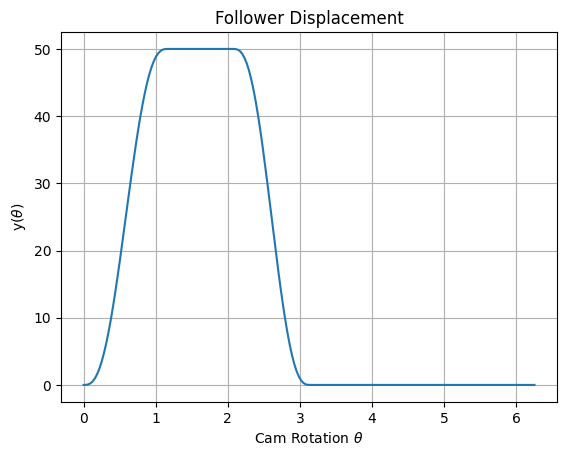

In [6]:
fig, ax = plt.subplots()
ax.plot(thetavec, yvec)
ax.grid()
ax.set_xlabel(r'Cam Rotation $\theta$')
ax.set_ylabel(r'y($\theta$)')
ax.set_title('Follower Displacement')

Text(0.5, 1.0, 'Follower Velocity')

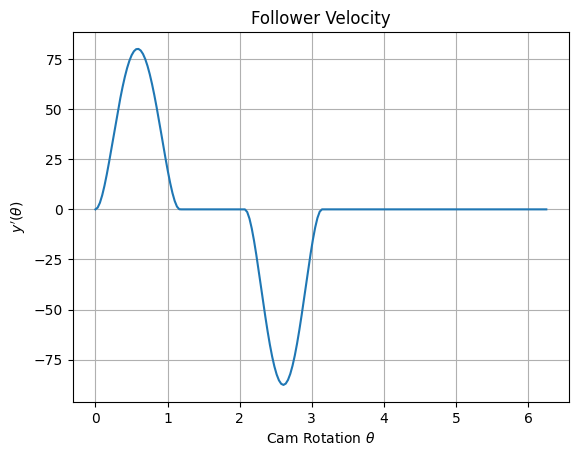

In [7]:
fig, ax = plt.subplots()
ax.plot(thetavec, vvec)
ax.grid()
ax.set_xlabel(r'Cam Rotation $\theta$')
ax.set_ylabel(r'$y^\prime$($\theta$)')
ax.set_title('Follower Velocity')

Text(0.5, 1.0, 'Follower Acceleration')

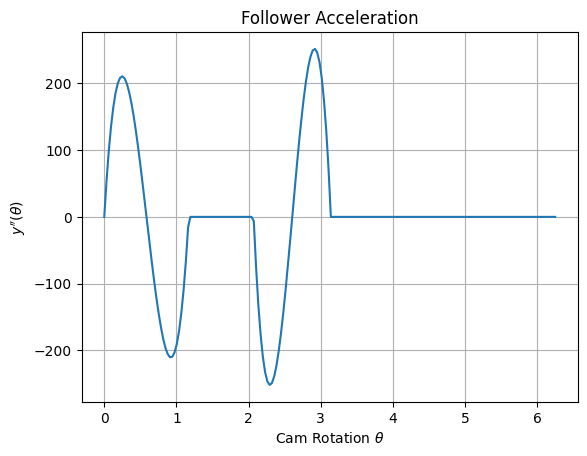

In [8]:
fig, ax = plt.subplots()
ax.plot(thetavec, avec)
ax.grid()
ax.set_xlabel(r'Cam Rotation $\theta$')
ax.set_ylabel(r'$y^{\prime \prime}$($\theta$)')
ax.set_title('Follower Acceleration')

Text(0, 0.5, 'y($\\theta$)+$y^{\\prime \\prime}$($\\theta$)')

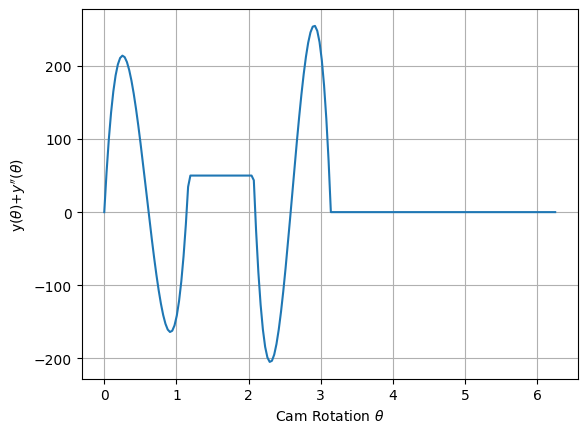

In [9]:
fig, ax = plt.subplots()
ax.plot(thetavec, yvec+avec)
ax.grid()
ax.set_xlabel(r'Cam Rotation $\theta$')
ax.set_ylabel(r'y($\theta$)+$y^{\prime \prime}$($\theta$)')

In [10]:
follower_face_min = np.max(vvec)+np.abs(np.min(vvec))

follower_face_min # output answer tut-7 Q-7

167.5624534508883

In [15]:
rho_min = 50 #input acc to qt
junk = np.min(yvec+avec)
rb = rho_min-junk
print(np.round(rb)) # output answer tut-7 Q-8
rb = 260 #input for next qt

255.0


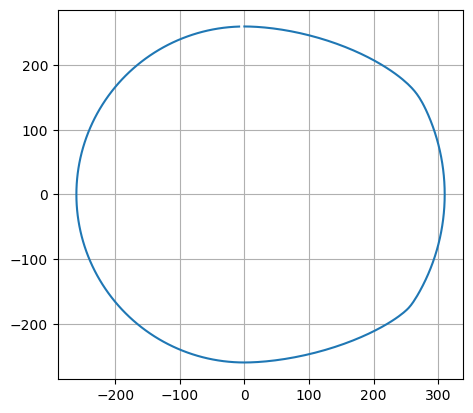

In [17]:
e = 40 #change value acc to question

#IMPORTANT: final cam profile
theta_c = np.zeros_like(thetavec)
r_c = np.zeros_like(thetavec)

for count in np.arange(np.size(thetavec)):
    thetaval = thetavec[count]
    yval = yvec[count]
    vval = vvec[count]
    junk1 = rb+yval
    r_c[count] = np.sqrt(vval**2+junk1**2)
    theta_c[count] = thetaval+np.arctan2(vval, junk1)
    
    
# transformation to cartesian coordinates    
x_c = np.zeros_like(thetavec)
y_c = np.zeros_like(thetavec)

x_c = r_c*np.sin(theta_c)
y_c = r_c*np.cos(theta_c)

fig, ax = plt.subplots()
ax.plot(x_c, y_c)
ax.set_aspect('equal')
ax.grid()